In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np
import os

### Visualização da distribuição de uma variável

![](https://media.giphy.com/media/zw69pUViBZCZW/giphy.gif)


Percentil 25%: 1.0
Percentil 50%: 3.0
Percentil 75%: 6.0
Lim. inferior: -6.5
Lim. superior: 13.5


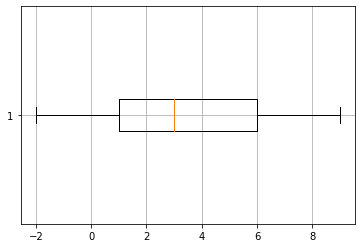

In [2]:
valores = [-2,0,2,3,4,8,9]
q1 = np.percentile(valores, 25)
print(f'Percentil 25%: {q1}')
print(f'Percentil 50%: {np.percentile(valores, 50)}')
q3 = np.percentile(valores, 75)
print(f'Percentil 75%: {q3}')
iqr = q3 - q1
l_sup = q3 + 1.5 * iqr
l_inf = q1 - 1.5 * iqr
print(f'Lim. inferior: {l_inf}')
print(f'Lim. superior: {l_sup}')

pl.boxplot(valores, vert=0)
pl.grid()
pl.show()

Vamos criar 1 dataframe com 2 variáveis, uma com distribuição normal e outra com distribuição bimodal, e visualizar a distribuição para cada uma dessas variáveis com [histograma](https://pt.wikipedia.org/wiki/Histograma) e [boxplot](https://pt.wikipedia.org/wiki/Diagrama_de_caixa).

In [3]:
df  = pd.DataFrame({'v1': np.random.normal(loc=10, scale=5, size=10000),
                    'v2': np.concatenate((np.random.normal(loc=10, scale=5, size=5000),
                          np.random.normal(loc=50, scale=10, size=5000)))})
df.head(2)

,v1,v2
0,8.362512,13.905105
1,13.033464,10.241629


In [4]:
df.describe()

,v1,v2
count,10000.000000,10000.000000
mean,9.949148,30.016119
std,5.071439,21.463714
min,-9.059830,-6.646346
25%,6.514462,10.033215
50%,10.006686,23.137231
75%,13.380411,50.014480
max,29.351856,84.861406


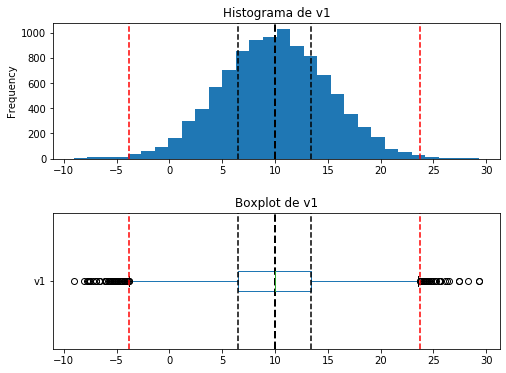

In [5]:
q1, q2, q3 = df['v1'].describe()[["25%","50%","75%"]]
iqr = q3 - q1
l_sup = q3 + 1.5 * iqr
l_inf = q1 - 1.5 * iqr

fig, axes = pl.subplots(nrows=2, ncols=1, figsize=(8,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
df['v1'].plot.hist(bins=30, ax=axes[0], title='Histograma de v1')
df['v1'].plot.box(vert=False, ax=axes[1], title='Boxplot de v1')

axes[0].axvline(x=q1, linestyle='--', color='k')
axes[0].axvline(x=q2, linestyle='--', color='k', linewidth=2)
axes[0].axvline(x=q3, linestyle='--', color='k')
axes[0].axvline(x=l_sup, linestyle='--', color='r')
axes[0].axvline(x=l_inf, linestyle='--', color='r')
axes[1].axvline(x=q1, linestyle='--', color='k')
axes[1].axvline(x=q2, linestyle='--', color='k', linewidth=2)
axes[1].axvline(x=q3, linestyle='--', color='k')
axes[1].axvline(x=l_sup, linestyle='--', color='r')
axes[1].axvline(x=l_inf, linestyle='--', color='r')

pl.show()

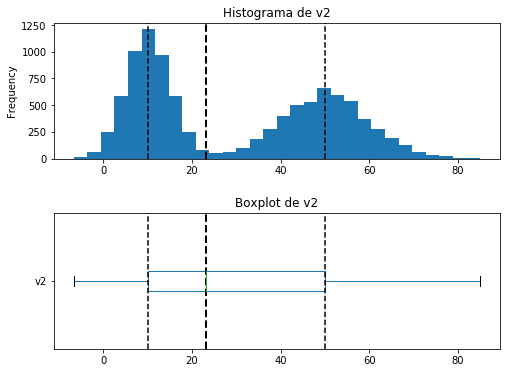

In [6]:
q1, q2, q3 = df['v2'].describe()[["25%","50%","75%"]]
iqr = q3 - q1
l_sup = q3 + 1.5 * iqr
l_inf = q1 - 1.5 * iqr

fig, axes = pl.subplots(nrows=2, ncols=1, figsize=(8,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
df['v2'].plot.hist(bins=30, ax=axes[0], title='Histograma de v2')
df['v2'].plot.box(vert=False, ax=axes[1], title='Boxplot de v2')

axes[0].axvline(x=q1, linestyle='--', color='k')
axes[0].axvline(x=q2, linestyle='--', color='k', linewidth=2)
axes[0].axvline(x=q3, linestyle='--', color='k')
axes[1].axvline(x=q1, linestyle='--', color='k')
axes[1].axvline(x=q2, linestyle='--', color='k', linewidth=2)
axes[1].axvline(x=q3, linestyle='--', color='k')
pl.show()

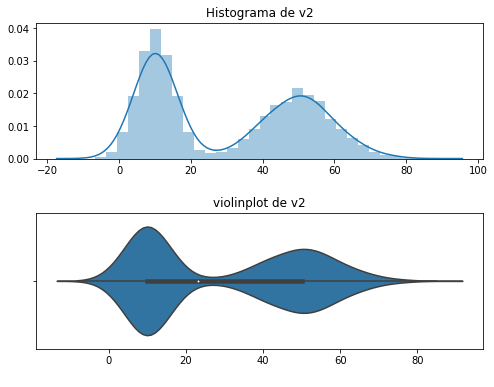

In [7]:
fig, axes = pl.subplots(nrows=2, ncols=1, figsize=(8,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
sns.distplot(df['v2'], bins=30, hist=True, kde=True, rug=False, ax=axes[0], fit=None)
axes[0].set_title('Histograma de v2')
axes[0].set_xlabel(' ')
sns.violinplot(df['v2'],ax=axes[1])
axes[1].set_title('violinplot de v2')
axes[1].set_xlabel(' ')
pl.show()

### Vamos analisar o percentual do tempo em um típico projeto de data science

![](https://media.giphy.com/media/3oz8xKaR836UJOYeOc/giphy.gif)

In [8]:
ds_project = pd.read_csv(os.path.join("data", "ds_survey2018_processado.csv"))
ds_project.head(2)

,current_role,data_vis_lib,prog_language,proportion_time-Gathering data,proportion_time-Cleaning data,proportion_time-Visualizing data,proportion_time-Model building/model selection,proportion_time-Putting the model into production,proportion_time-Finding insights in the data and communicating with stakeholders
0,Consultant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Desafio 1

Construa os seguintes gráficos para analisar o percentual de tempo em cada atividade de um projeto de data science:

- Usando o **seaborn** construa os gráficos de [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) e [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- Usando a **visualização do pandas** construa os [histogramas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) por atividade de um projeto de data science com a distribuição do percentual de tempo.

Dica: Para facilitar a seleção de colunas com atividade de um projeto de data science, use a função do pandas [filter](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html) e em regex passe o termo chave comum nessas colunas, como `proportion_time`.

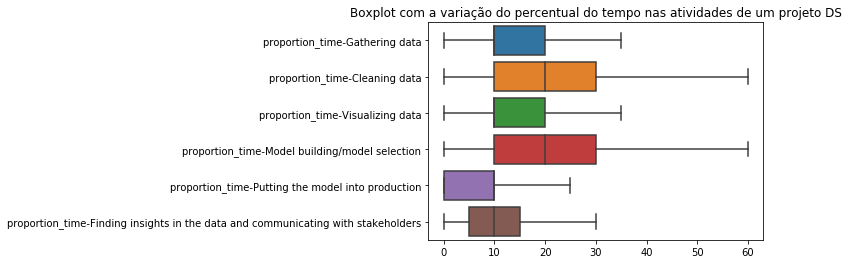

In [9]:
sns.boxplot(data=ds_project.filter(regex='proportion_time'), orient='h', showfliers=False)
pl.title("Boxplot com a variação do percentual do tempo nas atividades de um projeto DS")
pl.show()

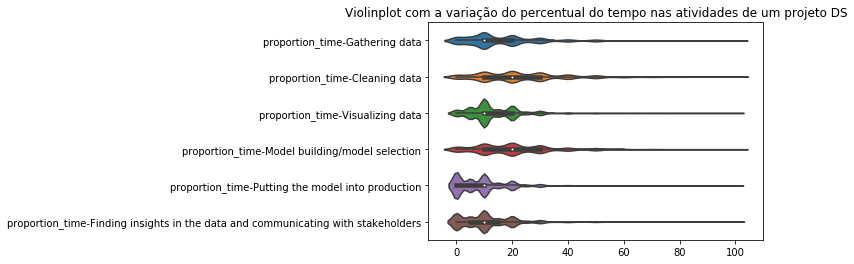

In [10]:
sns.violinplot(data=ds_project.filter(regex='proportion_time'), orient='h', showfliers=False)
pl.title("Violinplot com a variação do percentual do tempo nas atividades de um projeto DS")
pl.show()

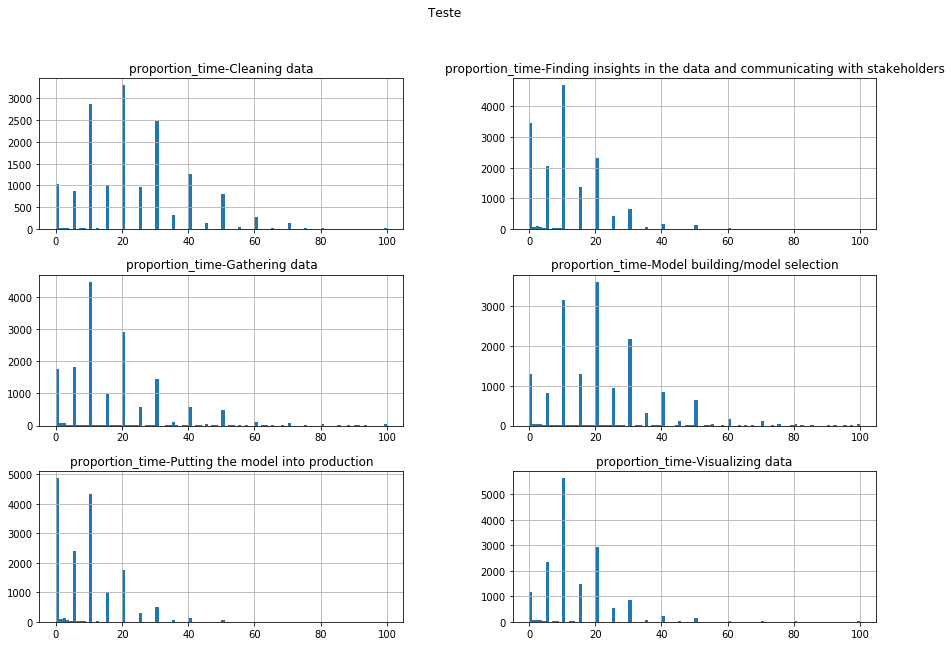

In [11]:
ds_project.filter(regex='proportion_time').hist(figsize=(15,10), bins=100)
pl.suptitle('Teste')
pl.show()

### Desafio 2 (Extra)

Construa o mesmo boxplot do desafio anterior, agora usando a **visualização do pandas**.

Dica: [Documentação do pandas boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html).

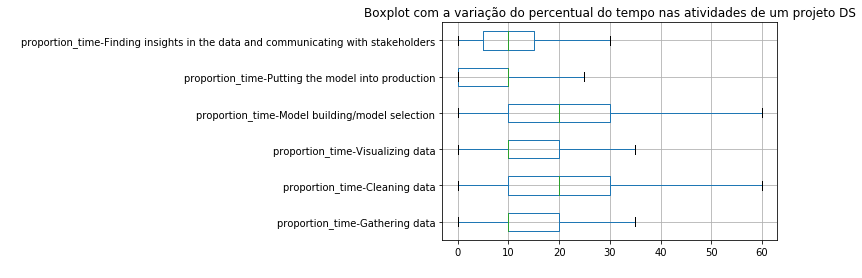

In [13]:
ds_project.filter(regex='proportion_time').boxplot(vert=0, showfliers=False)
pl.title("Boxplot com a variação do percentual do tempo nas atividades de um projeto DS")
pl.ylabel(' ')
pl.xlabel(' ')
pl.show()